## Time Series analysis project


In [31]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime


In [50]:
data=pd.read_csv('./data/airline_passenger_traffic.csv')

In [51]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [53]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

In [54]:
data=data.set_index(['Month'])

In [55]:

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Exploring the data

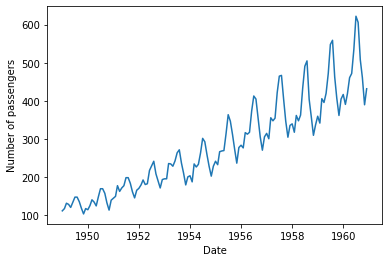

In [56]:
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.plot(data)

In [57]:
data.isna().sum()


#Passengers    0
dtype: int64

In [62]:
#detereming rolling statistics

rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


##### checking stationarity with rolling mean and standard deviation


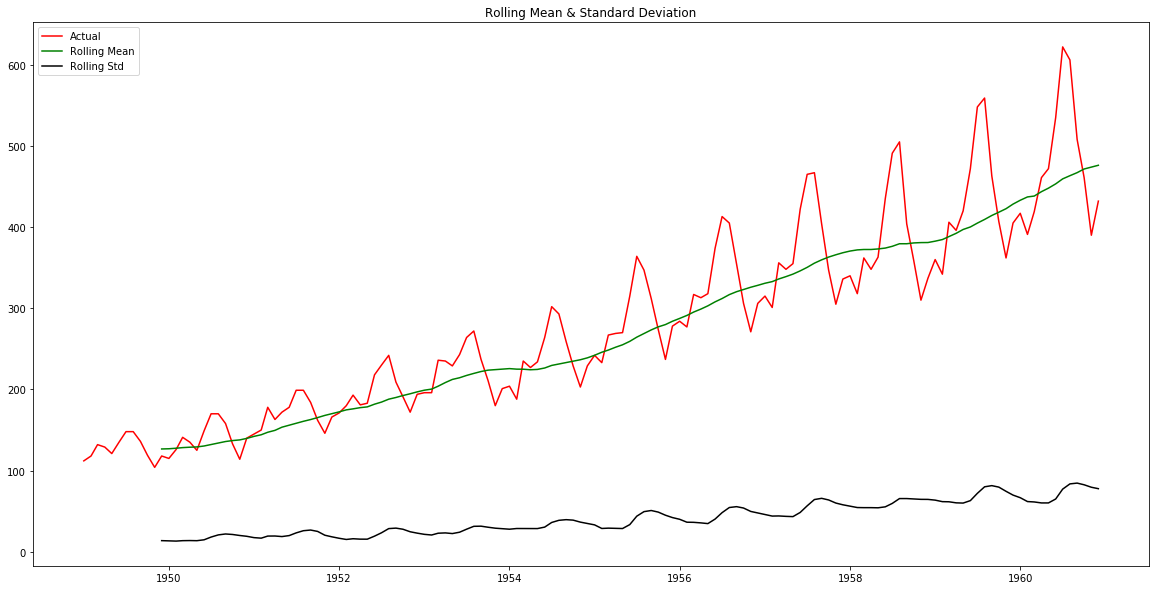

In [63]:
#plotting rolling mean and standard deviation
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
IF ADF has : Null hypothesis - Time Series is non-stationary

In [65]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05


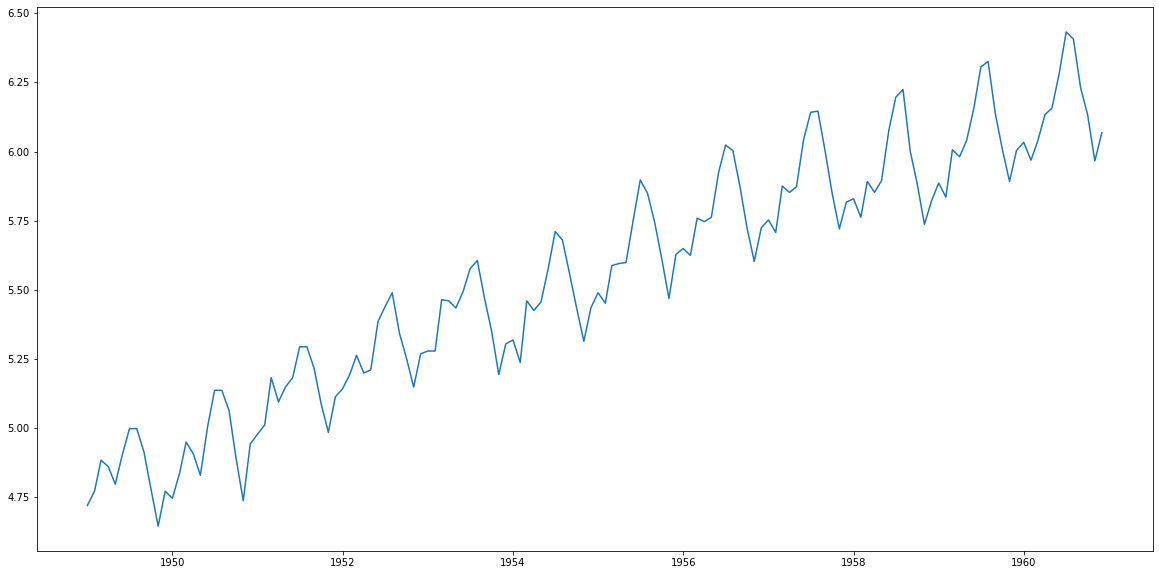

In [67]:
#Performing log transformation to make our Time series stationary and plotting
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)




In [68]:
#the log data has upward trend with seasonallity

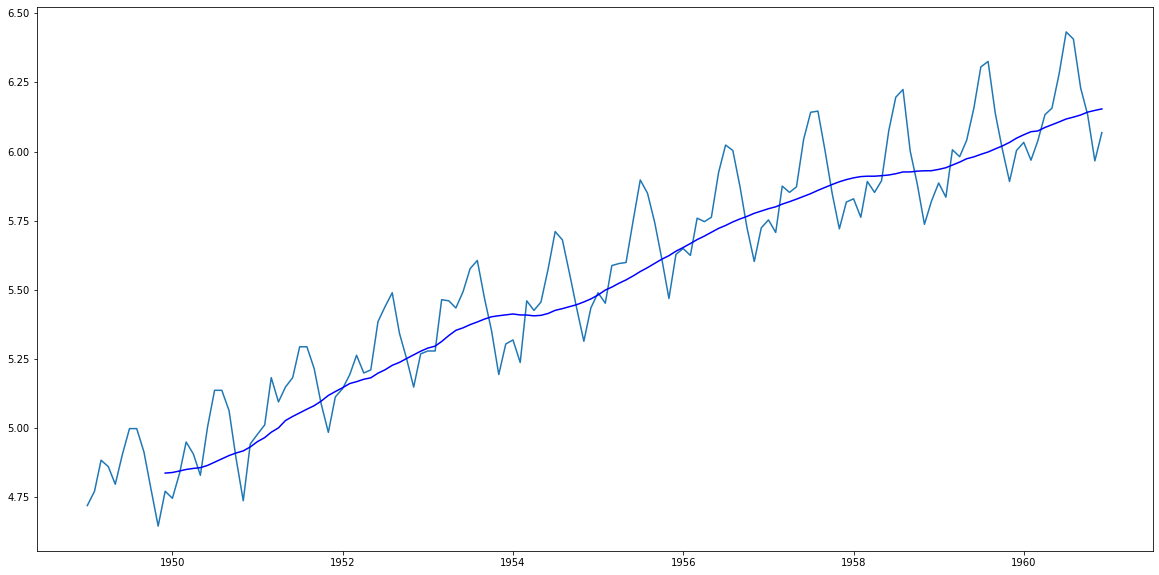

In [70]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

Calculated Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

In [71]:
#Using differencing method, to make our time series stationary
data_log_diff=data_log-MAvg
data_log_diff.head(12)


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [72]:
#dropping nan values
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [76]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

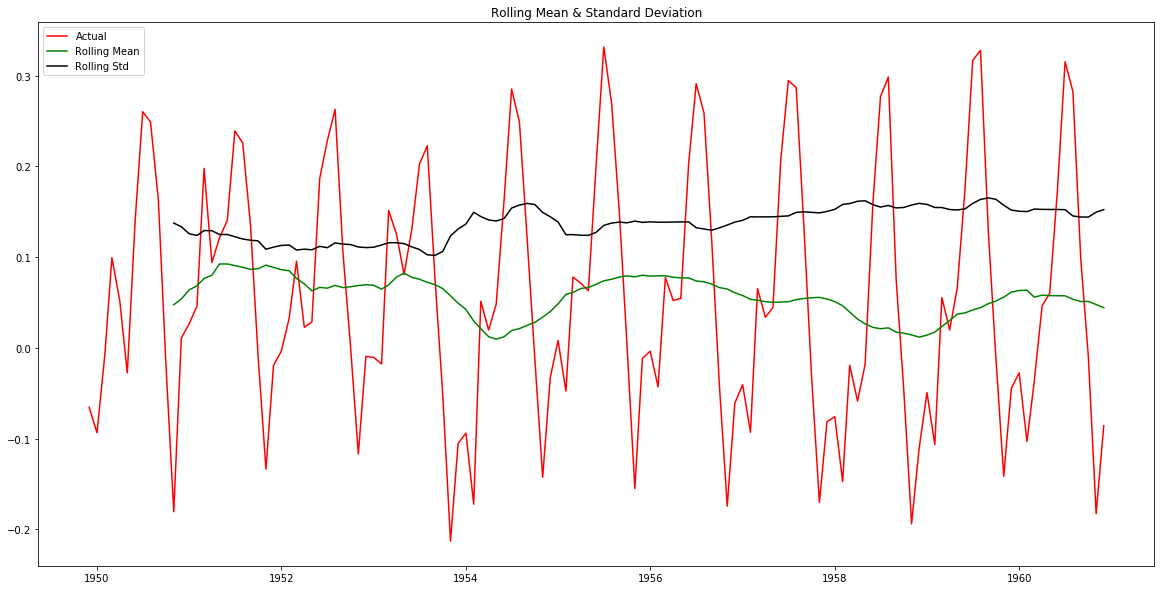

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [77]:
#Checking the stationarity of differenced data
stationarity(data_log_diff)


In [78]:
#From Rolling method, we see that Mean and standard deviation is not varying.
#From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
#Applying all the transformation and methods, our differenced data is now stationary

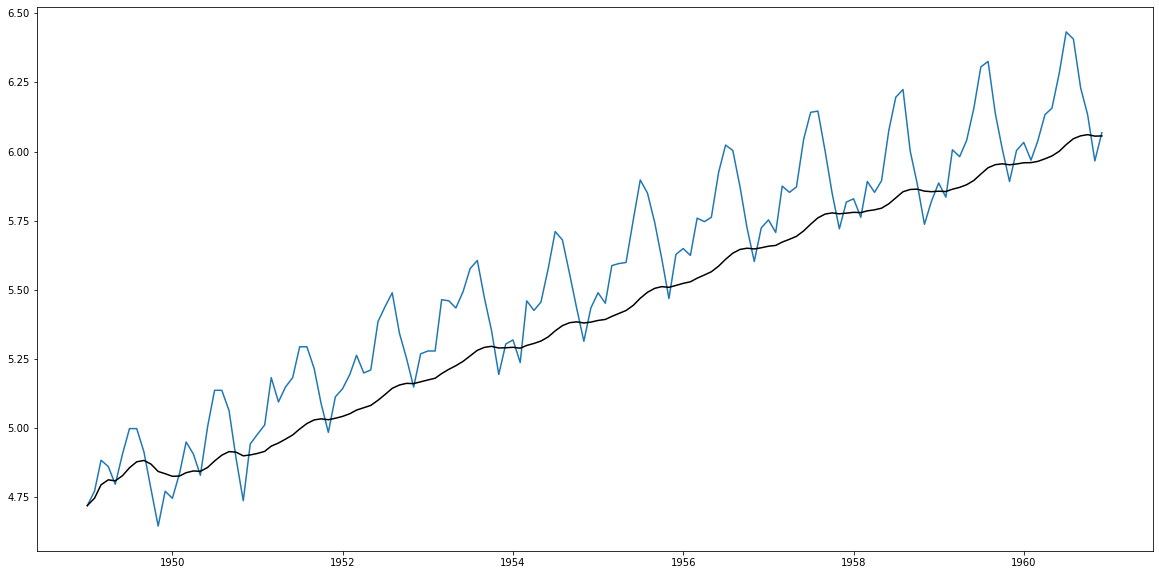

In [79]:
#performing exponential transformation on our data
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

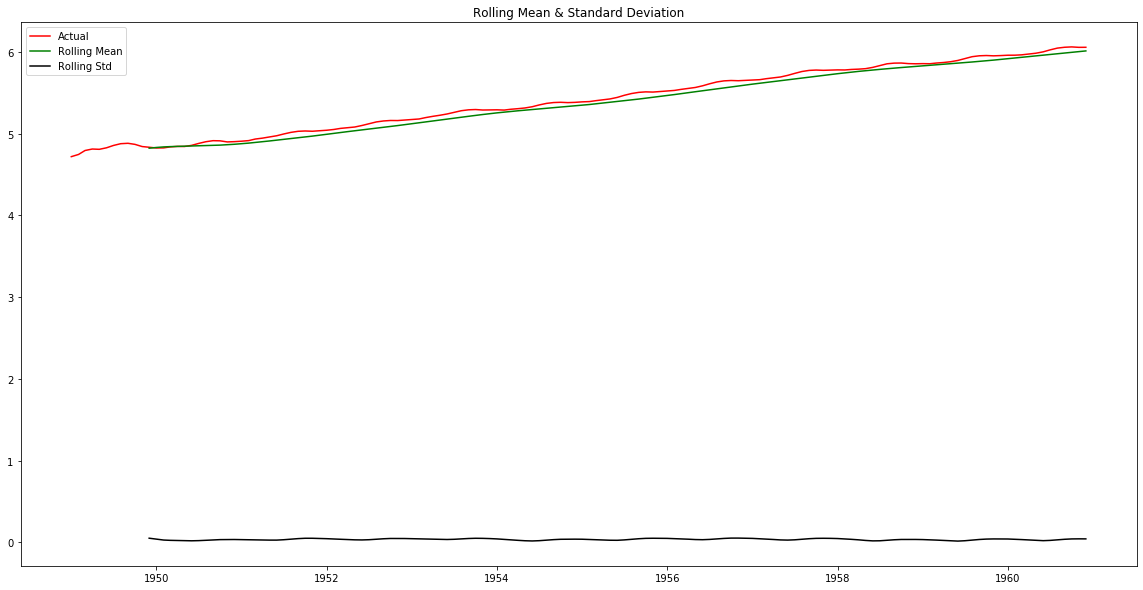

Dickey-Fuller Test: 
Test Statistic           -2.148248
p-value                   0.225561
Lags Used                14.000000
No. of Obs              129.000000
Critical Value (1%)      -3.482088
Critical Value (5%)      -2.884219
Critical Value (10%)     -2.578864
dtype: float64


In [80]:
#checking stationarity
stationarity(exp_data)

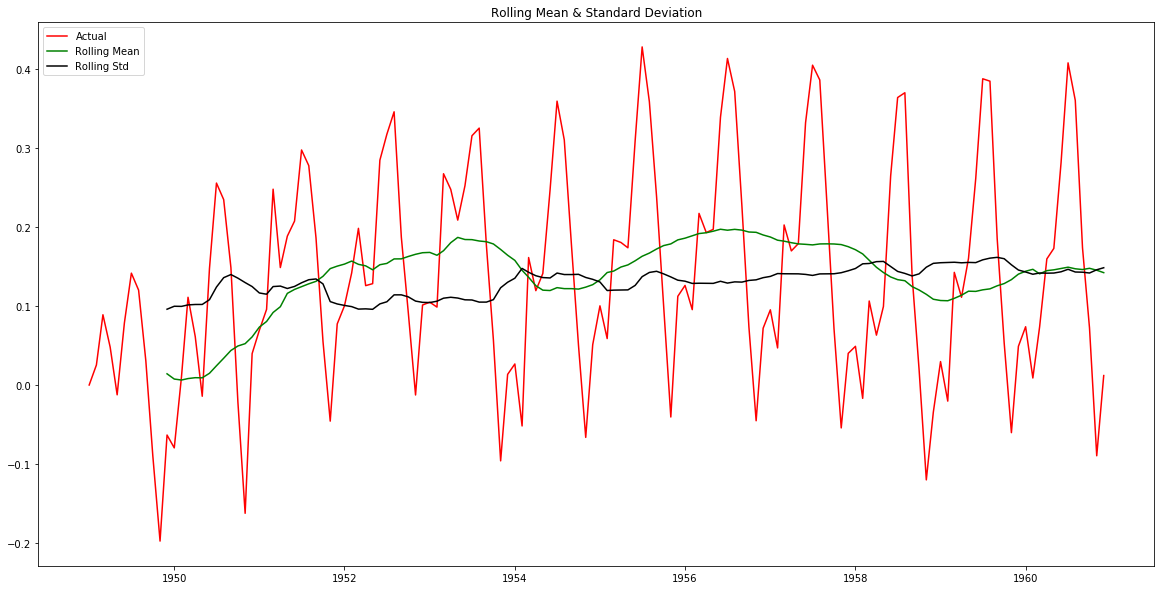

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [81]:
# Since exponential transformation is non-stationary, applying differencing on our data
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

From above graph and ADF test, we conclude, it is trend stationary

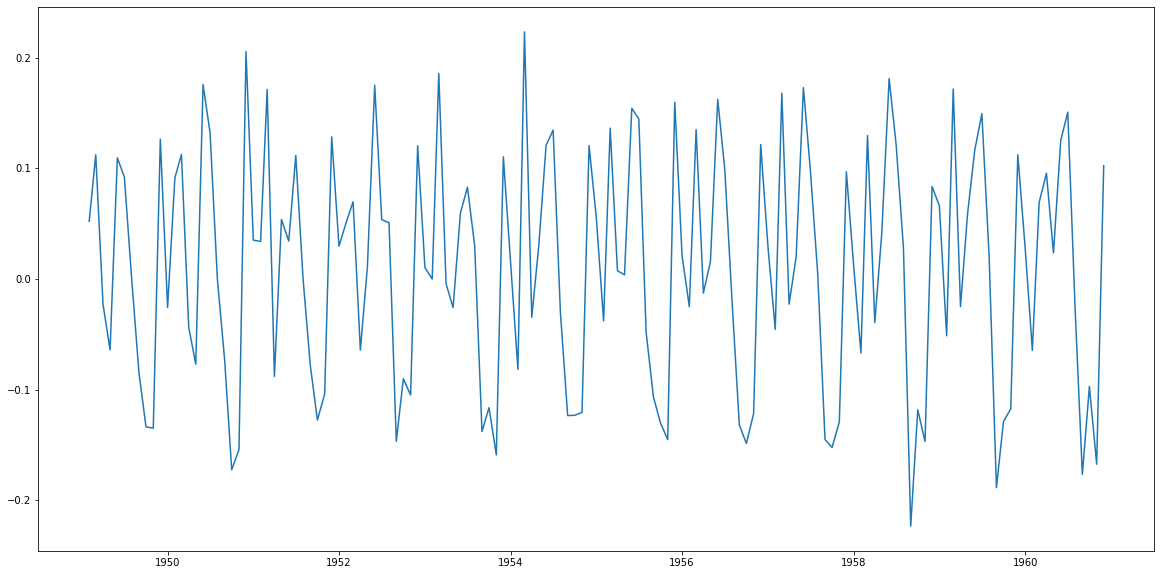

In [82]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)


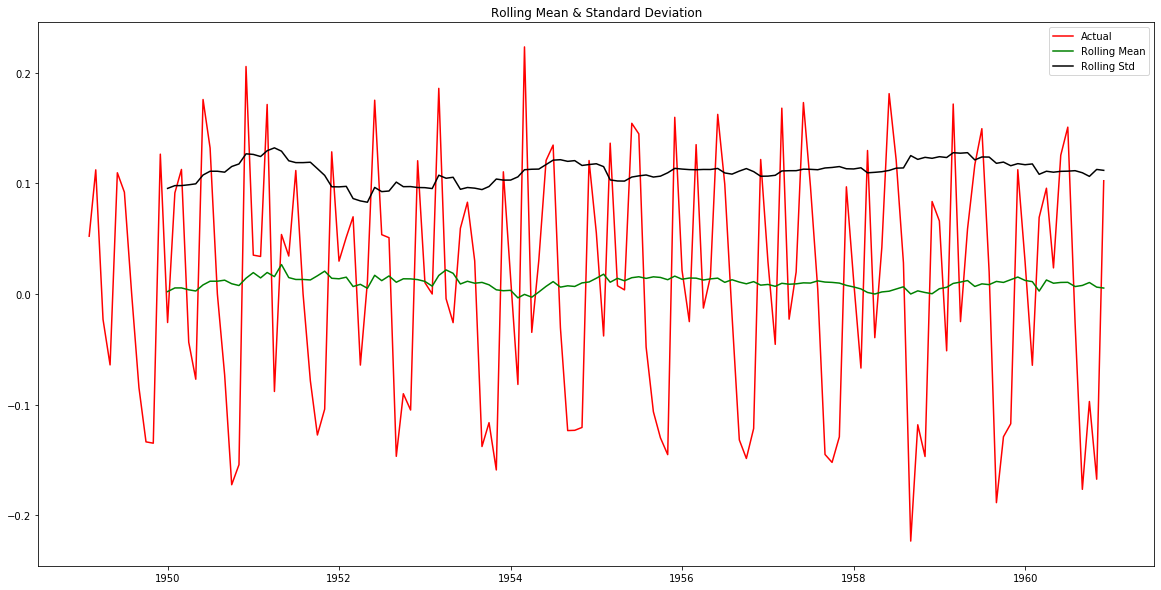

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [83]:

data_shift=data_shift.dropna()
stationarity(data_shift)

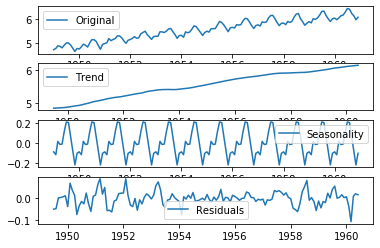

In [85]:
#Decomposing Time Series into its components : Trend, Seasonality and Residual

from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()

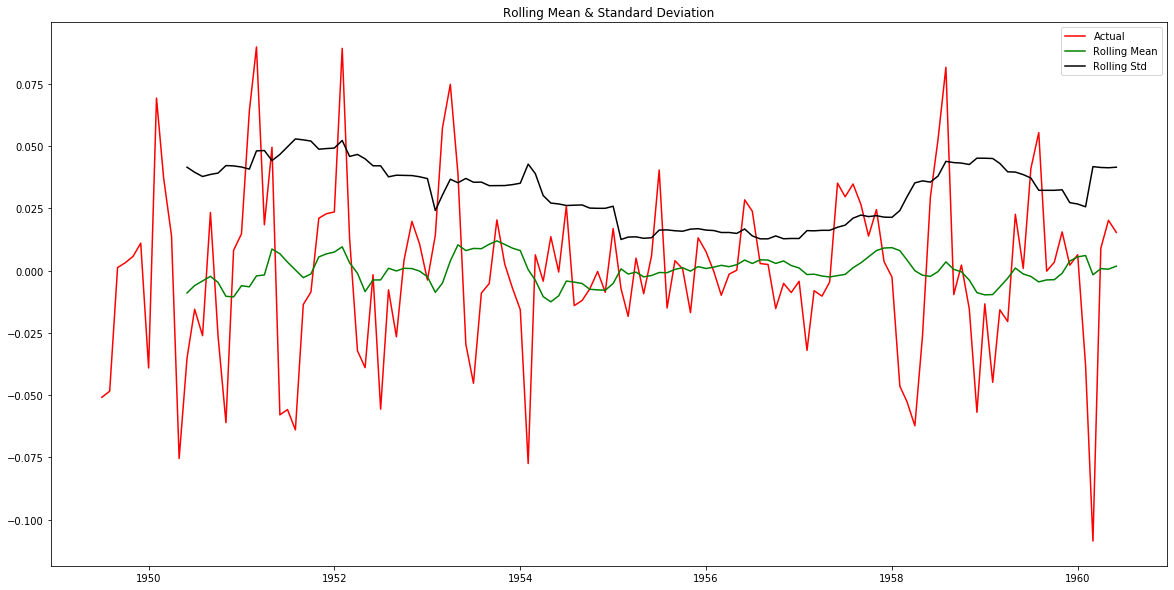

Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [86]:
#Checking the stationarity of Time Series components
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [88]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [89]:
arma_order_select_ic(data_shift)

{'bic':             0           1           2
 0 -225.639206 -228.618781 -228.527575
 1 -226.497365 -229.756336 -250.375467
 2 -225.753257 -255.336999 -269.503740
 3 -222.137562 -252.308122 -249.418687
 4 -232.957928 -253.670744 -253.229736, 'bic_min_order': (2, 2)}

###  Building AR model

In [91]:
from statsmodels.tsa.arima_model import ARIMA

Plotting AR model


C:\Users\Me\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Me\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


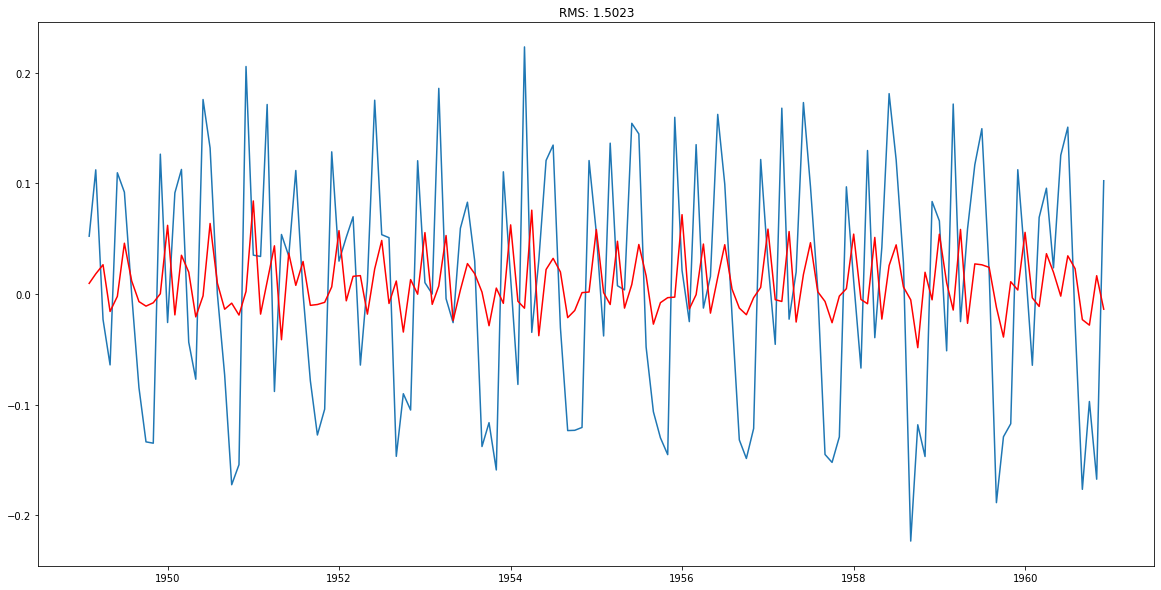

In [114]:
print('Plotting AR model')
model=ARIMA(data_log,order=(2,1,0))
result_AR=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RMS: %.4f'%sum((result_AR.fittedvalues-data_shift['#Passengers'])**2))
plt.show()

In [102]:
result_AR

In [103]:
data_log.tail()

,#Passengers
Month,
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398
1960-11-01,5.966147
1960-12-01,6.068426


In [134]:
predictions=pd.Series(result_AR.fittedvalues, copy=True)
print(predictions.tail())

Month
1960-08-01    0.022921
1960-09-01   -0.023143
1960-10-01   -0.028120
1960-11-01    0.016517
1960-12-01   -0.013713
dtype: float64


In [135]:
#Performing Inverse Transformation for differencing, by doing cumulative sum

predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009600
1949-03-01    0.027767
1949-04-01    0.054202
1949-05-01    0.038433
1949-06-01    0.036289
dtype: float64


In [136]:
#Below is data display of predicted value in log scale
predictions_log=pd.Series(data_log['#Passengers'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()


C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.728099
1949-03-01    4.746265
1949-04-01    4.772700
1949-05-01    4.756932
dtype: float64

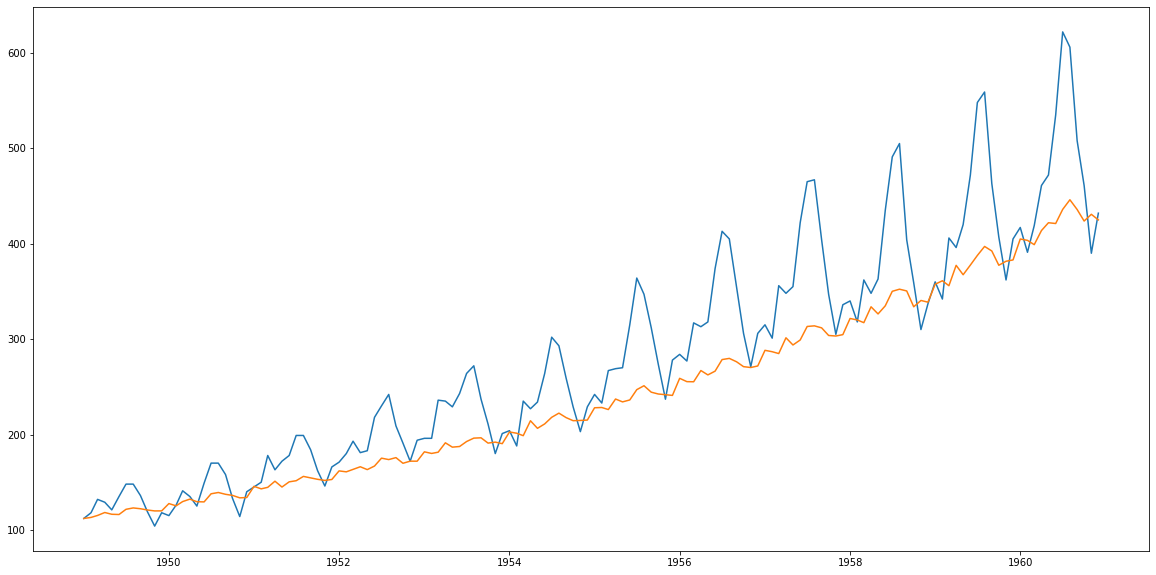

In [137]:

# Taking out log transformation and visualizing actual vs predicted value graph
predictions_AR=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_AR)

(array([6.13038723, 6.1363526 , 6.1360641 , 6.14395843, 6.15486143,
        6.16506273, 6.17457962, 6.1840561 , 6.1936411 , 6.20325866,
        6.21286518, 6.22246349, 6.23206176, 6.24166143, 6.25126145,
        6.2608613 , 6.27046106, 6.28006082, 6.2896606 , 6.29926039,
        6.30886017, 6.31845995, 6.32805973, 6.33765951, 6.34725929,
        6.35685907, 6.36645885, 6.37605863, 6.38565841, 6.39525819,
        6.40485797, 6.41445775, 6.42405753, 6.43365731, 6.44325709,
        6.45285687, 6.46245665, 6.47205643, 6.48165622, 6.491256  ,
        6.50085578, 6.51045556, 6.52005534, 6.52965512, 6.5392549 ,
        6.54885468, 6.55845446, 6.56805424, 6.57765402, 6.5872538 ,
        6.59685358, 6.60645336, 6.61605314, 6.62565292, 6.6352527 ,
        6.64485248, 6.65445226, 6.66405204, 6.67365182, 6.6832516 ,
        6.69285138, 6.70245116, 6.71205094, 6.72165072, 6.73125051,
        6.74085029, 6.75045007, 6.76004985, 6.76964963, 6.77924941,
        6.78884919, 6.79844897, 6.80804875, 6.81

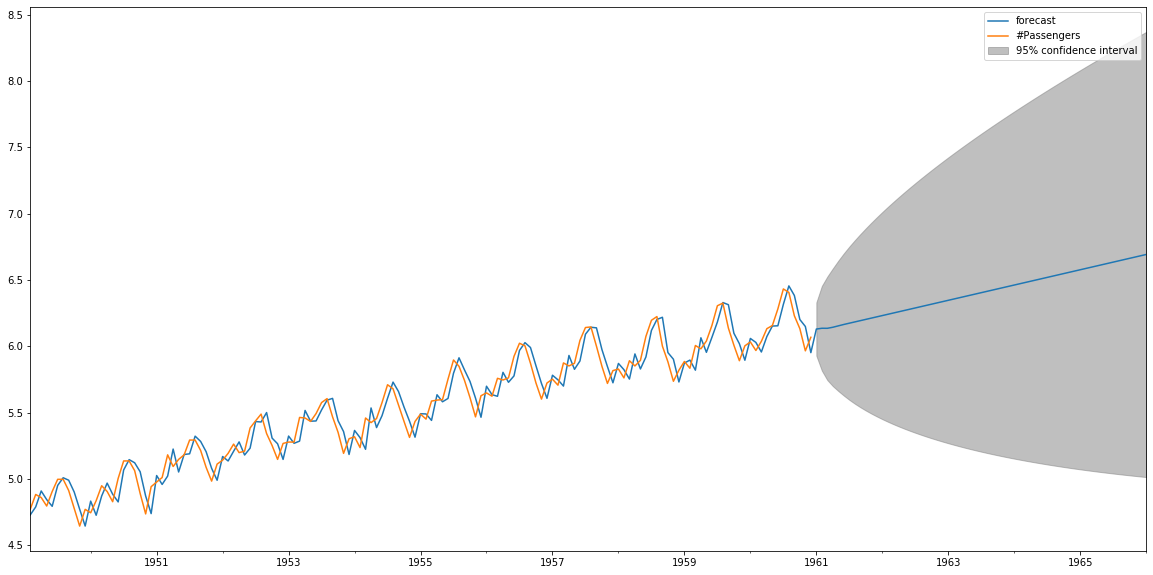

In [116]:
x=result_AR.forecast(steps=120)
x[0]


### Building MA model

Plotting MA model


C:\Users\Me\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Me\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


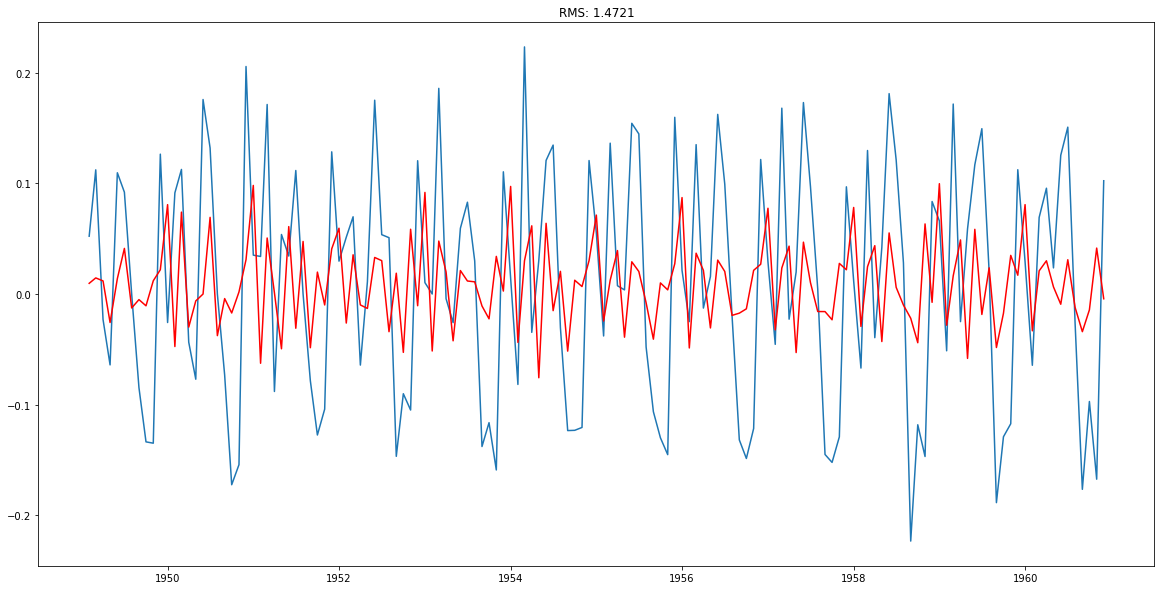

In [111]:
print('Plotting MA model')
model=ARIMA(data_log,order=(0,1,2))
result_MA=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RMS: %.4f'%sum((result_MA.fittedvalues-data_shift['#Passengers'])**2))
plt.show()

In [122]:

x=result_MA.forecast(steps=120)
x[0]

array([6.17073624, 6.14402918, 6.15366003, 6.16329088, 6.17292173,
       6.18255257, 6.19218342, 6.20181427, 6.21144512, 6.22107597,
       6.23070682, 6.24033767, 6.24996852, 6.25959937, 6.26923022,
       6.27886107, 6.28849191, 6.29812276, 6.30775361, 6.31738446,
       6.32701531, 6.33664616, 6.34627701, 6.35590786, 6.36553871,
       6.37516956, 6.3848004 , 6.39443125, 6.4040621 , 6.41369295,
       6.4233238 , 6.43295465, 6.4425855 , 6.45221635, 6.4618472 ,
       6.47147805, 6.48110889, 6.49073974, 6.50037059, 6.51000144,
       6.51963229, 6.52926314, 6.53889399, 6.54852484, 6.55815569,
       6.56778654, 6.57741739, 6.58704823, 6.59667908, 6.60630993,
       6.61594078, 6.62557163, 6.63520248, 6.64483333, 6.65446418,
       6.66409503, 6.67372588, 6.68335672, 6.69298757, 6.70261842,
       6.71224927, 6.72188012, 6.73151097, 6.74114182, 6.75077267,
       6.76040352, 6.77003437, 6.77966522, 6.78929606, 6.79892691,
       6.80855776, 6.81818861, 6.82781946, 6.83745031, 6.84708

#### ARIMA MODEL

Plotting AR model


C:\Users\Me\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Me\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


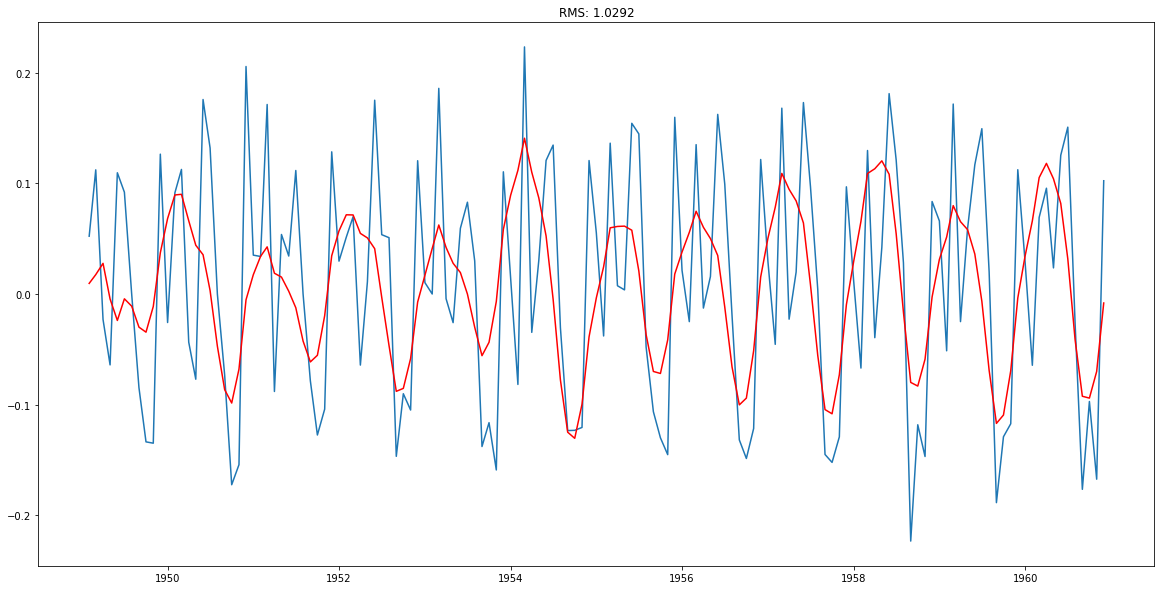

In [118]:
print('Plotting AR model')
model=ARIMA(data_log,order=(2,1,2))
result_ARIMA=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RMS: %.4f'%sum((result_ARIMA.fittedvalues-data_shift['#Passengers'])**2))
plt.show()

In [126]:
predictions=pd.Series(result_ARIMA.fittedvalues, copy=True)
print(predictions.head())


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [128]:
#Performing Inverse Transformation for differencing, by doing cumulative sum

predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [130]:
#Below is data display of predicted value in log scale
predictions_log=pd.Series(data_log['#Passengers'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

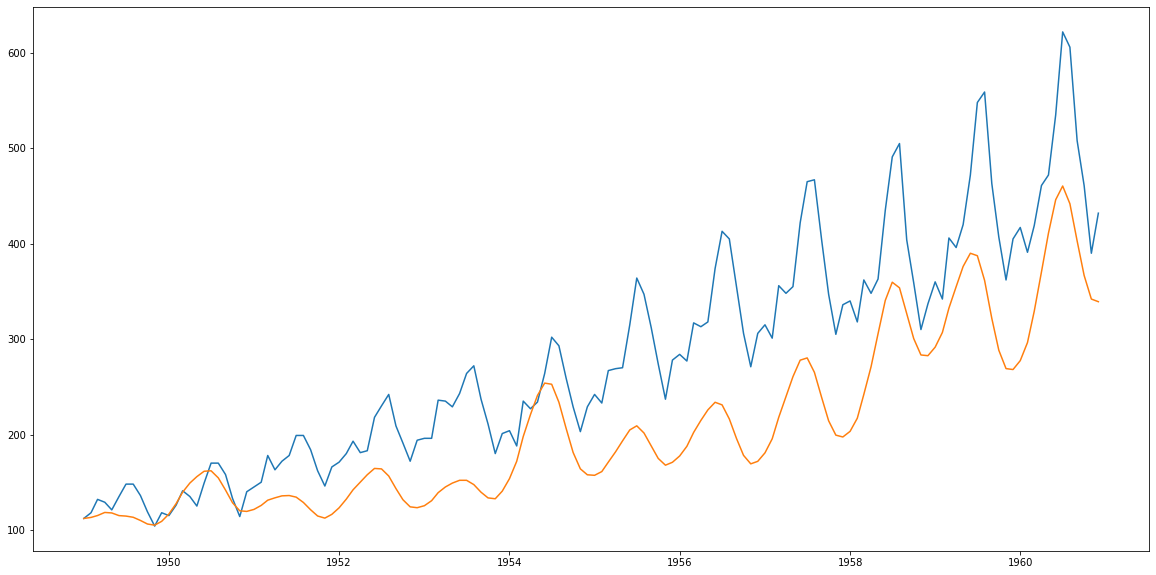

In [131]:
# Taking out log transformation and visualizing actual vs predicted value graph
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

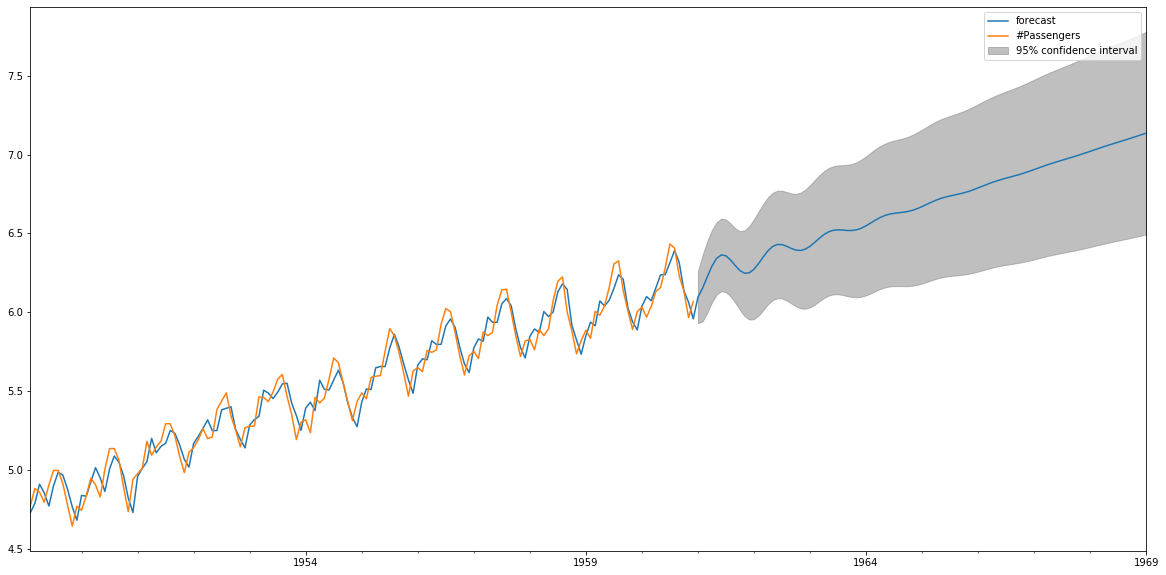

In [133]:
rcParams['figure.figsize']=20,10
result_ARIMA.plot_predict(1,240)
x=result_ARIMA.forecast(steps=12)